In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import math
import datetime
import pickle
import joblib

model_rfr_ftr = joblib.load('savemodel_rfr_ftr.sav')
model_rfr_hpo = joblib.load('savemodel_rfr_ftr_hpo.sav')

dfmain = pd.read_csv("AIS_weather_H_ok2_copy.csv",parse_dates=["Time"])
dfmain = dfmain[dfmain['LAT'] > 55.04 ]

dfpre = pd.read_csv("AIS_weather_h_rename_copy.csv",parse_dates=["Time"])
dfpre = dfpre[dfpre['LAT'] > 55.04 ]

In [2]:
dfmain = dfmain.drop(['Wind Speed','Current Speed'],axis=1)

In [3]:
dfpre = dfpre.drop(dfpre.columns[[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,21,22,23,26]],axis=1)
dfpre = dfpre.rename({'Eastward wind': 'eastwind', 'Northward wind': 'northwind',
                           'Eastward current': 'eastcurrent', 'Northward current': 'northcurrent',
                           'SOG':'sog','COG':'cog','Heading':'heading'},axis=1) 
dfpre.head(n=5)

,eastwind,northwind,eastcurrent,northcurrent,sog,cog
0,2.267688,6.741482,0.113690,0.044994,0.0,358.9
1,1.782681,6.410275,0.113690,0.044994,0.0,358.9
2,1.154659,6.385135,0.083984,0.054000,0.0,358.9
3,0.348801,6.094659,0.083984,0.054000,0.0,358.9
4,-0.593128,6.153186,0.083984,0.054000,0.0,358.9


In [4]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=50)
imputer.fit(dfpre)

KNNImputer(n_neighbors=50)

In [5]:
x_pre = imputer.transform(dfpre)

In [6]:
dfpre = pd.DataFrame(x_pre, columns=dfpre.columns, index=dfpre.index)

In [7]:
dfpre["Current Speed"] = np.sqrt(dfpre["eastcurrent"]**2 + dfpre["northcurrent"]**2)
dfpre["Wind Speed"] = np.sqrt(dfpre["eastwind"]**2 + dfpre["northwind"]**2)

In [8]:
dfpre.describe()

,eastwind,northwind,eastcurrent,northcurrent,sog,cog,Current Speed,Wind Speed
count,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000
mean,1.976344,0.379926,0.019228,0.004214,8.870751,242.699284,0.096788,6.513813
std,5.296850,4.429899,0.089903,0.074041,8.619512,108.555287,0.067697,3.048934
min,-15.216397,-12.824582,-0.491010,-0.404690,-0.009130,-0.134241,0.000735,0.193221
25%,-1.756650,-2.534061,-0.021486,-0.033055,0.000000,124.116508,0.047447,4.149883
50%,2.294543,0.385690,0.025485,0.003718,6.953578,283.216008,0.079148,6.285080
75%,5.838650,3.339456,0.062644,0.039626,18.014436,346.200000,0.128444,8.525129
max,16.338177,14.519458,0.522374,0.364966,21.070514,359.728115,0.525174,16.760001


In [9]:
dfpre["True North Wind Direction"] =  180 +  np.rad2deg(np.arctan((dfpre["eastwind"])/(dfpre["northwind"])))

# dfpre["True North Wind Direction"] = np.where(dfpre["True North Wind Direction"] > 0, 180 + dfpre["True North Wind Direction"] , 180 - dfpre["True North Wind Direction"])

# if dfpre["True North Wind Direction"]<0:
#     dfpre["True North Wind Direction"] = 180 - dfpre["True North Wind Direction"]
# elif dfpre["True North Wind Direction"]>0:
#     dfpre["True North Wind Direction"] = 180 - dfpre["True North Wind Direction"]

In [10]:
dfpre["True North Current Direction"] = np.rad2deg(np.arctan(dfpre["eastcurrent"]/dfpre["northcurrent"]))

In [11]:
dfpre = dfpre.drop(['eastwind','northwind','eastcurrent','northcurrent','sog','cog'],axis=1)

In [12]:
df = pd.concat([dfmain,dfpre],axis=1)
df.head()

,Unnamed: 0,Time,LON,LAT,Temperature above oceans,Air density above oceans,Max wave height,Swell period,Wind wave period,Wave period,...,Heading,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction,Current Speed,Wind Speed,True North Wind Direction,True North Current Direction
0,0,2021-01-01 00:00:00,14.689663,55.098452,277.311035,1.259323,1.893614,4.818881,3.818459,4.154329,...,174.0,155.408180,105.591753,22.854050,22.749664,22.610062,0.122270,7.112664,198.591820,68.408246
1,1,2021-01-01 01:00:00,14.689659,55.098451,277.328369,1.259985,1.752303,4.755800,3.470216,4.130580,...,174.0,158.458891,105.591753,26.122772,19.152008,22.209274,0.122270,6.653538,195.541109,68.408246
2,2,2021-01-01 02:00:00,14.689648,55.098468,277.390625,1.260244,1.619775,4.645083,3.259682,4.083755,...,174.0,163.749663,116.740448,28.498383,12.424912,20.857971,0.099846,6.488697,190.250337,57.259552
3,3,2021-01-01 03:00:00,14.689646,55.098471,277.411377,1.260148,1.518736,4.588384,3.177906,4.010502,...,174.0,170.724504,116.740448,29.956985,6.725922,18.732071,0.099846,6.104632,183.275496,57.259552
4,4,2021-01-01 04:00:00,14.689644,55.098462,277.430664,1.260634,1.455034,4.528841,3.281654,3.913362,...,174.0,179.505940,116.740448,34.486298,3.761627,15.731430,0.099846,6.181707,174.494060,57.259552


In [13]:
# SOG threshold according to Abebe
df = df[df['SOG'] > 5 ]

In [14]:
# Exclude data for the month of June to check the model's forecasting performance 

dfdate6 = df[df['Time'].dt.strftime('%Y-%m') == '2021-06']
df = df[df['Time'].dt.strftime('%Y-%m') != '2021-06']

# Extract information of a journey from a single day

koege_dep = df[df['Time'].dt.strftime('%Y-%m-%d %H:%M:%S') == '2021-05-31 23:00:00']
koege_arr = dfdate6[dfdate6['Time'].dt.strftime('%Y-%m-%d') == '2021-06-01']

# Drop the departure time for next trip

koege_arr2 = koege_arr.drop(koege_arr.index[14])

# To gain information for a single trip from Koege to Ronne

ronne_arr = koege_arr.drop(koege_arr.index[4:15])

dfday6 = pd.concat([koege_dep,koege_arr2])
dfone6 = pd.concat([koege_dep,ronne_arr])

# # For Qgis Single Journey
# dfday6.to_csv("AIS_01_06_21_koegeronne.csv")

In [15]:
dfdate6 = dfdate6.drop(['Unnamed: 0','Time','LON','LAT','Air density above oceans',
'Surface pressure','Width','Length'],axis=1)
dfdate6.head(n=5)

,Temperature above oceans,Max wave height,Swell period,Wind wave period,Wave period,Sea surface temperature,Combined wind waves and swell height,Swell height,Wind wave height,Draught,...,Heading,True Wind Direction,True Current Direction,True Swell Direction,True Wind Wave Direction,True Wave Direction,Current Speed,Wind Speed,True North Wind Direction,True North Current Direction
119,275.823975,3.358080,6.738089,4.925452,5.291555,278.661621,1.759765,0.743164,1.583740,5.281861,...,100.782313,100.989288,164.871808,15.554049,66.843493,57.268527,0.144914,10.248966,201.771601,85.654121
120,275.924011,3.578120,7.185143,5.342444,5.697814,278.936035,1.950242,0.841925,1.757568,5.289403,...,96.934816,108.737155,153.650411,11.071672,60.455881,51.313932,0.246220,11.364678,205.671971,70.585227
121,276.285034,4.184914,7.260825,5.460486,6.126474,279.209961,2.189788,0.933936,1.910706,5.288446,...,97.525758,114.910729,153.031589,16.281358,57.086511,46.894106,0.284315,12.666946,212.436488,70.557348
122,277.189484,4.908680,6.808745,6.225745,6.284671,279.216553,2.565230,0.723303,2.452637,5.290781,...,106.941521,123.568984,153.643227,69.175152,55.507286,56.527939,0.300428,13.386999,230.510505,80.584748
126,277.408752,4.621826,6.813305,5.970984,6.291378,279.319824,2.414834,1.022894,2.130981,4.842367,...,227.680837,26.476633,41.766758,158.632374,159.050718,167.192888,0.262897,12.053293,254.157471,89.447596


In [16]:
dfdate6= dfdate6.rename({'Max wave height': 'waveheight', 'Draught': 'draught',
                           'SOG': 'sog', 'Wind Speed': 'windspeed', 
                           'True Wind Direction': 'truewinddir','Temperature above oceans' : 'oceantemperature',
                           'COG': 'cog', 'Current Speed' : 'curspeed','True Wave Direction' : 'truewavedir',
                            'Swell period': 'swellperiod','Wind wave period': 'windwaveperiod','Sea surface temperature': 'surftemp',
                            'Combined wind waves and swell height': 'windwaveswellheight','Swell height': 'swellheight','Wind wave height': 'windwaveheight',
                            'Heading': 'heading','True Current Direction': 'truecurrentdir','True Swell Direction': 'trueswelldir',
                            'True Wind Wave Direction': 'truewindwavedir','Wave period': 'waveperiod',
                            'True North Wind Direction' : 'truenorthwinddir' , 'True North Current Direction' : 'truenorthcurrentdir'
                           }, axis=1) 

In [17]:
# Rearrange column to match model 
# Also dropping the features as described in the main script

dfdate6 = dfdate6[['oceantemperature','waveperiod','surftemp','windwaveswellheight','draught','sog','cog','heading','windspeed','curspeed','truewinddir','truecurrentdir','truewavedir', 'truenorthwinddir' , 'truenorthcurrentdir']]


# dfdate6 = dfdate6[['oceantemperature','waveheight','swellperiod','windwaveperiod','waveperiod','surftemp','windwaveswellheight','swellheight','windwaveheight','draught','sog','cog','heading','windspeed','curspeed','truewinddir','truecurrentdir','trueswelldir','truewindwavedir','truewavedir', 'truenorthwinddir' , 'truenorthcurrentdir']]

In [18]:
stats2 = dfdate6['curspeed'].value_counts()

In [19]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=50)


In [20]:
imputer.fit(dfdate6)

KNNImputer(n_neighbors=50)

In [21]:
xdate = imputer.transform(dfdate6)

In [22]:
dfdate6tr = pd.DataFrame(xdate, columns=dfdate6.columns, index=dfdate6.index)

In [23]:
x_date = dfdate6tr.drop(['sog','truenorthcurrentdir','truenorthwinddir'],axis=1)
y_date = dfdate6tr.sog

In [24]:
def predict_y(x_test,model_type):
    y_predicted = model_type.predict(x_test)
    return y_predicted

def display_scores(x_test,y_test,model_type):
    from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error
    print("R^2 score (Indicate model fit. Best Score = 1):", model_type.score(x_test,y_test))
    print("Explained Variance EV (Indicate amount of variance in model. Best Score = 1):", explained_variance_score(y_test,y_predicted))
    print("Mean Absolute Error MAE (Indicate how much error a model makes in its prediction. Best Score = 0):", mean_absolute_error(y_test,y_predicted))
    print("Root Mean Square Error RMSE (Same as MAE, more sensitive to outlier. Best Score = 0):", mean_squared_error(y_test,y_predicted))
    print("Median Absolute Error MAD (Check robustness against outlier. Best Score = 1):", median_absolute_error(y_test,y_predicted))

y_predicted = predict_y(x_date,model_rfr_ftr)
display_scores(x_date,y_date,model_rfr_ftr)

R^2 score (Indicate model fit. Best Score = 1): 0.8661050856280904
Explained Variance EV (Indicate amount of variance in model. Best Score = 1): 0.8850235304894934
Mean Absolute Error MAE (Indicate how much error a model makes in its prediction. Best Score = 0): 0.8120179128967392
Root Mean Square Error RMSE (Same as MAE, more sensitive to outlier. Best Score = 0): 1.2579811826079608
Median Absolute Error MAD (Check robustness against outlier. Best Score = 1): 0.6359169406449978


In [40]:
# Prediction using FTR + HPO

y_predicted_hpo = predict_y(x_date,model_rfr_hpo)
display_scores(x_date,y_date,model_rfr_hpo)


R^2 score (Indicate model fit. Best Score = 1): 0.8669978195823334
Explained Variance EV (Indicate amount of variance in model. Best Score = 1): 0.8850235304894934
Mean Absolute Error MAE (Indicate how much error a model makes in its prediction. Best Score = 0): 0.8120179128967392
Root Mean Square Error RMSE (Same as MAE, more sensitive to outlier. Best Score = 0): 1.2579811826079608
Median Absolute Error MAD (Check robustness against outlier. Best Score = 1): 0.6359169406449978


In [25]:
ydate_pred = y_predicted
dfprog_sog = pd.Series(y_date,name="sog_act").to_frame()
dfprog_sog["sog_pred"] = ydate_pred
dfprog_sog["gamma"] = dfdate6tr["truenorthcurrentdir"]
dfprog_sog["nwinddir"] = dfdate6tr["truenorthwinddir"]

print(dfprog_sog)

        sog_act   sog_pred      gamma    nwinddir
119   18.998906  18.455288  85.654121  201.771601
120   19.334278  18.795703  70.585227  205.671971
121   18.911047  18.644532  70.557348  212.436488
122   13.854933  14.024321  80.584748  230.510505
126    9.305198  10.570792  89.447596  254.157471
...         ...        ...        ...         ...
7413  19.072622  18.311208 -75.033834  110.959927
7414  17.696584  17.571069  86.330174  126.837339
7415  15.963630  16.559061  83.486098  119.018621
7418   8.988086   8.579939  89.745593  140.723377
7419  17.672769  17.361172  15.792214  143.902554

[322 rows x 4 columns]


In [26]:
dfprog = pd.concat([x_date,dfprog_sog],axis=1)
dfprog.head(n=10)

,oceantemperature,waveperiod,surftemp,windwaveswellheight,draught,cog,heading,windspeed,curspeed,truewinddir,truecurrentdir,truewavedir,sog_act,sog_pred,gamma,nwinddir
119,275.823975,5.291555,278.661621,1.759765,5.281861,102.832130,100.782313,10.248966,0.144914,100.989288,164.871808,57.268527,18.998906,18.455288,85.654121,201.771601
120,275.924011,5.697814,278.936035,1.950242,5.289403,98.691177,96.934816,11.364678,0.246220,108.737155,153.650411,51.313932,19.334278,18.795703,70.585227,205.671971
121,276.285034,6.126474,279.209961,2.189788,5.288446,99.598616,97.525758,12.666946,0.284315,114.910729,153.031589,46.894106,18.911047,18.644532,70.557348,212.436488
122,277.189484,6.284671,279.216553,2.565230,5.290781,88.475574,106.941521,13.386999,0.300428,123.568984,153.643227,56.527939,13.854933,14.024321,80.584748,230.510505
126,277.408752,6.291378,279.319824,2.414834,4.842367,142.835632,227.680837,12.053293,0.262897,26.476633,41.766758,167.192888,9.305198,10.570792,89.447596,254.157471
127,277.399658,6.061778,279.230591,2.021695,4.841530,301.967467,301.939331,11.667020,0.181460,49.650197,36.203894,119.939682,20.935741,17.412213,85.735437,252.289134
128,275.499359,5.927387,287.021892,1.754722,4.852890,214.510860,251.124778,9.043038,0.281402,11.124505,16.745666,176.253205,12.419853,12.743485,87.870444,240.000273
130,276.370789,5.959699,286.794441,1.585114,4.923635,129.288093,126.654641,8.393962,0.185268,121.750507,148.640604,54.778275,20.447721,16.416408,-84.704755,248.405148
131,277.268555,5.876345,279.216553,1.731217,4.925344,108.812979,107.899157,9.328641,0.133047,156.811217,154.901600,41.385363,18.702889,16.535211,82.800757,264.710374
134,277.220703,5.585643,279.216553,1.490863,5.202804,288.331616,270.659656,9.022607,0.139192,1.584058,10.961510,159.775304,16.155258,16.543889,-78.378834,269.075598


In [27]:
# Conversion of predicted SOG to m/s

dfprog["vgms"] = dfprog["sog_pred"]/1.9438

# Conversion of actual SOG to m/s

dfprog["vgms_act"] = dfprog["sog_act"]/1.9438

In [28]:
# Conversion of the angles to radian

rad_gamma = np.deg2rad(dfprog["gamma"])
rad_cog = np.deg2rad(dfprog["cog"])

In [29]:
# Calculation of the predicted x-component of SOG

dfprog["vgx"] = dfprog["vgms"] * np.sin(rad_cog)
dfprog["vcx"] = dfprog["curspeed"] * np.sin(rad_gamma)
dfprog["stw_x"] = (dfprog["vgx"] - dfprog["vcx"])

# Calculation of the actual x-component of SOG

dfprog["vgx_act"] = dfprog["vgms_act"] * np.sin(rad_cog)
dfprog["stw_x_act"] = (dfprog["vgx_act"] - dfprog["vcx"])


In [30]:
# Calculation of the predicted y-component of SOG 

dfprog["vgy"] = dfprog["vgms"] * np.cos(rad_cog)
dfprog["vcy"] = dfprog["curspeed"] * np.cos(rad_gamma)
dfprog["stw_y"] = (dfprog["vgy"] - dfprog["vcy"])

# Calculation of the actual y-component of SOG

dfprog["vgy_act"] = dfprog["vgms_act"] * np.cos(rad_cog)
dfprog["stw_y_act"] = (dfprog["vgy_act"] - dfprog["vcy"])


In [31]:
# For the actual data
dfprog["vwms_a"] = np.sqrt(dfprog["stw_x_act"]**2 + dfprog["stw_y_act"]**2)
dfprog["stw_act"] = dfprog["vwms_a"]*1.9438

# For the prediction

dfprog["vwms_p"] = np.sqrt(dfprog["stw_x"]**2 + dfprog["stw_y"]**2)
dfprog["stw_pred"] = dfprog["vwms_p"]*1.9438



In [32]:
dfprog = dfprog.drop(['vgms','vgx','vcx','stw_x',
                      'vgy','vcy','stw_y',
                      'vgms_act','vgx_act','stw_x_act',
                      'vgy_act','stw_y_act',
                      'vwms_p','vwms_a'],axis=1)
#df_ship.head(n=5)
dfprog.head(n=10)

,oceantemperature,waveperiod,surftemp,windwaveswellheight,draught,cog,heading,windspeed,curspeed,truewinddir,truecurrentdir,truewavedir,sog_act,sog_pred,gamma,nwinddir,stw_act,stw_pred
119,275.823975,5.291555,278.661621,1.759765,5.281861,102.832130,100.782313,10.248966,0.144914,100.989288,164.871808,57.268527,18.998906,18.455288,85.654121,201.771601,18.729972,18.186361
120,275.924011,5.697814,278.936035,1.950242,5.289403,98.691177,96.934816,11.364678,0.246220,108.737155,153.650411,51.313932,19.334278,18.795703,70.585227,205.671971,18.913459,18.374923
121,276.285034,6.126474,279.209961,2.189788,5.288446,99.598616,97.525758,12.666946,0.284315,114.910729,153.031589,46.894106,18.911047,18.644532,70.557348,212.436488,18.429833,18.163347
122,277.189484,6.284671,279.216553,2.565230,5.290781,88.475574,106.941521,13.386999,0.300428,123.568984,153.643227,56.527939,13.854933,14.024321,80.584748,230.510505,13.276732,13.446117
126,277.408752,6.291378,279.319824,2.414834,4.842367,142.835632,227.680837,12.053293,0.262897,26.476633,41.766758,167.192888,9.305198,10.570792,89.447596,254.157471,9.009772,10.274216
127,277.399658,6.061778,279.230591,2.021695,4.841530,301.967467,301.939331,11.667020,0.181460,49.650197,36.203894,119.939682,20.935741,17.412213,85.735437,252.289134,21.221281,17.697957
128,275.499359,5.927387,287.021892,1.754722,4.852890,214.510860,251.124778,9.043038,0.281402,11.124505,16.745666,176.253205,12.419853,12.743485,87.870444,240.000273,12.753846,13.077291
130,276.370789,5.959699,286.794441,1.585114,4.923635,129.288093,126.654641,8.393962,0.185268,121.750507,148.640604,54.778275,20.447721,16.416408,-84.704755,248.405148,20.747280,16.716202
131,277.268555,5.876345,279.216553,1.731217,4.925344,108.812979,107.899157,9.328641,0.133047,156.811217,154.901600,41.385363,18.702889,16.535211,82.800757,264.710374,18.470818,16.303187
134,277.220703,5.585643,279.216553,1.490863,5.202804,288.331616,270.659656,9.022607,0.139192,1.584058,10.961510,159.775304,16.155258,16.543889,-78.378834,269.075598,15.886581,16.275211


In [33]:
dfprog.describe()

,oceantemperature,waveperiod,surftemp,windwaveswellheight,draught,cog,heading,windspeed,curspeed,truewinddir,truecurrentdir,truewavedir,sog_act,sog_pred,gamma,nwinddir,stw_act,stw_pred
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,287.133146,3.393579,287.278174,0.655332,5.282713,197.436423,189.432992,5.832751,0.092478,86.173628,86.811052,96.133203,17.449699,17.028102,-11.849461,179.967365,17.440998,17.019416
std,6.306975,0.964939,4.798404,0.542441,0.162420,86.327689,88.499255,3.020207,0.068917,62.588681,59.359251,61.547388,3.069944,2.779023,55.353826,63.036318,3.059230,2.760118
min,269.606903,1.915993,275.485352,0.073242,4.754639,82.664990,79.551648,0.441768,0.002006,0.565115,1.295289,0.200645,5.224523,5.298920,-89.500098,90.107133,5.211211,5.333568
25%,285.292786,2.692099,286.837568,0.272528,5.199718,103.569971,101.685445,3.442231,0.043318,24.875738,28.600108,35.663590,16.568861,16.688404,-60.671287,119.047681,16.581974,16.637008
50%,289.505615,3.162097,289.004578,0.465021,5.290842,193.360899,125.125521,5.528616,0.073482,82.212973,79.271353,103.381967,18.413643,18.052315,-26.065061,170.499216,18.399973,18.002111
75%,291.391602,3.734216,290.458008,0.769191,5.381292,283.259801,279.238872,7.569939,0.123647,149.107733,146.039105,158.470366,19.421633,18.611046,35.032562,244.414903,19.417551,18.594703
max,294.685303,6.291378,292.665649,2.565230,5.657671,319.851509,304.969531,13.386999,0.417155,179.309007,179.405213,179.699225,21.031230,19.736164,89.975398,269.737370,21.221281,19.822316


In [34]:
# FOC in T/d
dfprog["foc_act"] = ((dfprog["stw_act"]/17.7)**3) * 21.14112
dfprog["foc_pred"] = ((dfprog["stw_pred"]/17.7)**3) * 21.14112


In [35]:
dfprog.head(n=10)

,oceantemperature,waveperiod,surftemp,windwaveswellheight,draught,cog,heading,windspeed,curspeed,truewinddir,truecurrentdir,truewavedir,sog_act,sog_pred,gamma,nwinddir,stw_act,stw_pred,foc_act,foc_pred
119,275.823975,5.291555,278.661621,1.759765,5.281861,102.832130,100.782313,10.248966,0.144914,100.989288,164.871808,57.268527,18.998906,18.455288,85.654121,201.771601,18.729972,18.186361,25.050684,22.932193
120,275.924011,5.697814,278.936035,1.950242,5.289403,98.691177,96.934816,11.364678,0.246220,108.737155,153.650411,51.313932,19.334278,18.795703,70.585227,205.671971,18.913459,18.374923,25.794140,23.652919
121,276.285034,6.126474,279.209961,2.189788,5.288446,99.598616,97.525758,12.666946,0.284315,114.910729,153.031589,46.894106,18.911047,18.644532,70.557348,212.436488,18.429833,18.163347,23.865601,22.845245
122,277.189484,6.284671,279.216553,2.565230,5.290781,88.475574,106.941521,13.386999,0.300428,123.568984,153.643227,56.527939,13.854933,14.024321,80.584748,230.510505,13.276732,13.446117,8.922402,9.268275
126,277.408752,6.291378,279.319824,2.414834,4.842367,142.835632,227.680837,12.053293,0.262897,26.476633,41.766758,167.192888,9.305198,10.570792,89.447596,254.157471,9.009772,10.274216,2.788365,4.134797
127,277.399658,6.061778,279.230591,2.021695,4.841530,301.967467,301.939331,11.667020,0.181460,49.650197,36.203894,119.939682,20.935741,17.412213,85.735437,252.289134,21.221281,17.697957,36.435353,21.133802
128,275.499359,5.927387,287.021892,1.754722,4.852890,214.510860,251.124778,9.043038,0.281402,11.124505,16.745666,176.253205,12.419853,12.743485,87.870444,240.000273,12.753846,13.077291,7.909183,8.526319
130,276.370789,5.959699,286.794441,1.585114,4.923635,129.288093,126.654641,8.393962,0.185268,121.750507,148.640604,54.778275,20.447721,16.416408,-84.704755,248.405148,20.747280,16.716202,34.048008,17.808242
131,277.268555,5.876345,279.216553,1.731217,4.925344,108.812979,107.899157,9.328641,0.133047,156.811217,154.901600,41.385363,18.702889,16.535211,82.800757,264.710374,18.470818,16.303187,24.025177,16.520595
134,277.220703,5.585643,279.216553,1.490863,5.202804,288.331616,270.659656,9.022607,0.139192,1.584058,10.961510,159.775304,16.155258,16.543889,-78.378834,269.075598,15.886581,16.275211,15.286199,16.435694


In [37]:
# df_foc=dfprog.drop(['oceantemperature','waveheight','swellperiod','windwaveperiod','waveperiod',
#                     'surftemp','windwaveswellheight','swellheight','windwaveheight','swellheight',
#                     'windwaveheight','draught','cog','heading','windspeed','curspeed','truewinddir','truecurrentdir','trueswelldir','truewindwavedir',
#                     'truewavedir','gamma','nwinddir'],axis=1)

df_foc=dfprog.drop(['oceantemperature','waveperiod',
                    'surftemp','windwaveswellheight',
                    'draught','cog','heading','windspeed','curspeed','truewinddir','truecurrentdir',
                    'truewavedir','gamma','nwinddir'],axis=1)

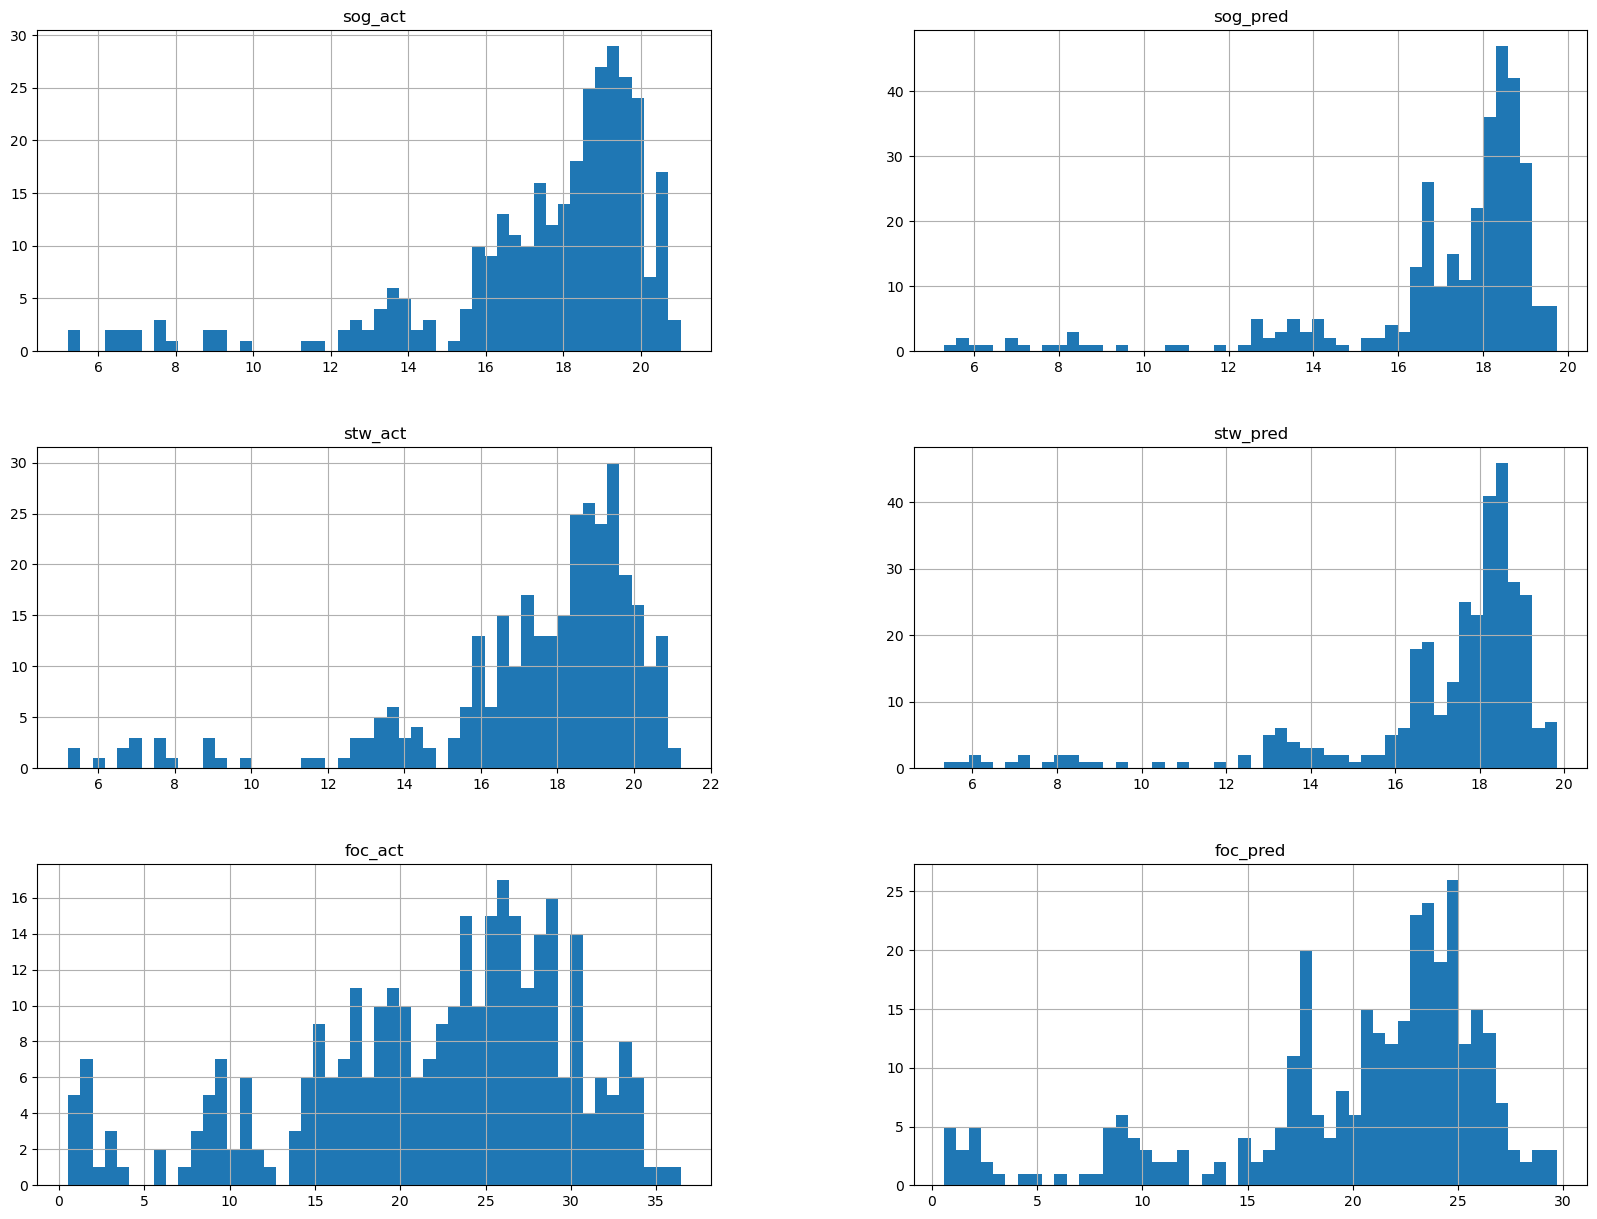

In [38]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
df_foc.hist(bins=50,figsize=(20,15))
plt.show()

In [39]:
foc_month = dfprog['foc_pred'].mean()
foc_month_a = dfprog['foc_act'].mean()
print(f"Mean of predicted FOC in a month is {foc_month} T//d")
print(f"Mean of actual FOC in a month is {foc_month_a} T//d")

Mean of predicted FOC in a month is 20.084211069522244 T//d
Mean of actual FOC in a month is 21.87772146283159 T//d
